In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Análisis de consumo de clientes mayoristas 

El conjunto de datos se refiere a los clientes de un distribuidor mayorista. Incluye el gasto anual en unidades monetarias en diversas categorías de productos.
El objetivo del proyecto es agrupar los clientes en forma optima de acuerdo a su cantidad de consumo. 

In [100]:
# Importamos el dataset:
df=pd.read_csv('Wholesale customers data.csv')
# Eliminamos las columnas Region y Channel ya que no queremos que influyan en la agrupación: 
df = df.drop(['Channel', 'Region'], axis=1)
df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


In [101]:
# Mostramos la información del dataset: 
df.info()  
print('El conjunto de datos cuenta con 440 filas y 6 columnas. No posee datos nulos.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB
El conjunto de datos cuenta con 440 filas y 6 columnas. No posee datos nulos.


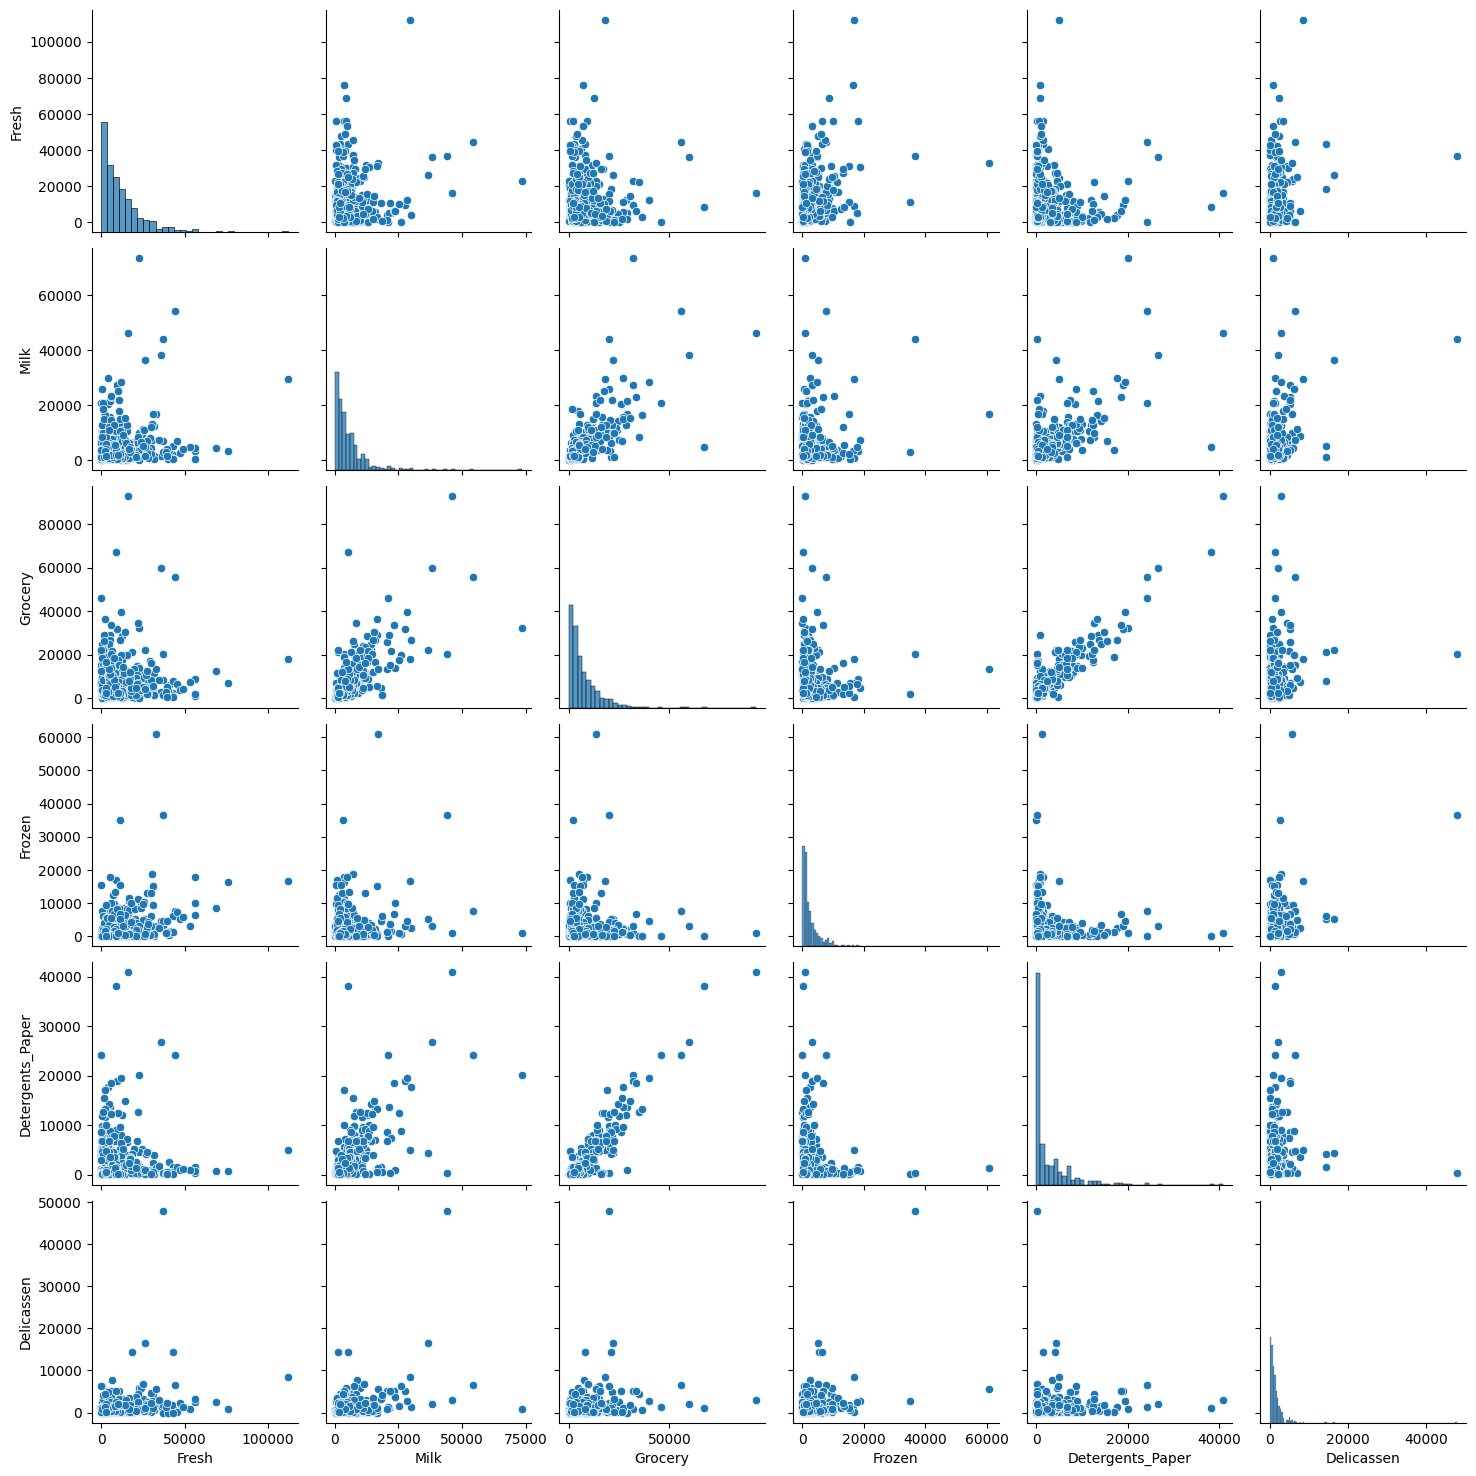

In [102]:
# Realizamos un grafico Pairplor para mostrar el comportamiento de las variables entre sí: 
sns.pairplot(df)

Vamos a utilizar PCA para reducir la dimensionalidad del data set para reducirlo a dos variables y así poder graficarlo en dos dimensiones.

In [103]:
# En primera instancia escalamos las variables:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [104]:
pca=PCA(random_state=0, n_components=2)
df_pca=pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(data=df_pca, columns=['Var_1', 'Var_2'])

Text(0, 0.5, 'Variable 2')

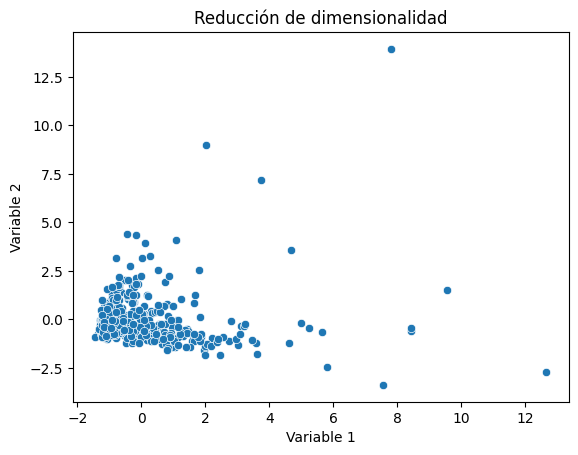

In [105]:
scatter_PCA=sns.scatterplot(x='Var_1', y='Var_2', data=df_pca)
scatter_PCA.set_title('Reducción de dimensionalidad')
scatter_PCA.set_xlabel('Variable 1')
scatter_PCA.set_ylabel('Variable 2')

A continuación vamos a entrenar modelos para definir el número de clústeres óptimo. Para ello, utilizaremos la métrica de la sumas de las distancias cuadráticas de los puntos y veremos su comportamiento con un gráfico. 

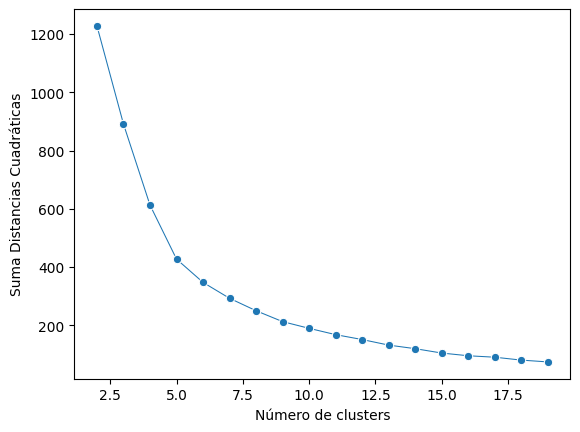

In [106]:
sum_q_distances=[]
k_folks=range(2,20)

for k_folk in k_folks:
    kmeans=KMeans(n_clusters=k_folk,random_state=0)
    kmeans.fit(df_pca)
    sum_q_distances.append(kmeans.inertia_)

sns.lineplot(x=k_folks,y=sum_q_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

En el gráfico, podemos observar que la curva comienza a aplanarse, lo que indica que la disminución abrupta se estabiliza alrededor del valor de K igual a 6. Por lo tanto, podemos concluir que el número óptimo de clústeres para este conjunto de datos es 6.

In [107]:
# Entrenamos un nuevo modelo pero utilizando el número de clústeres optimo encontrado anteriormente:
kmeans = KMeans(n_clusters=6, random_state=10)  
df_pca['Cluster']= kmeans.fit_predict(df_scaled)

Text(0, 0.5, 'Variable 2')

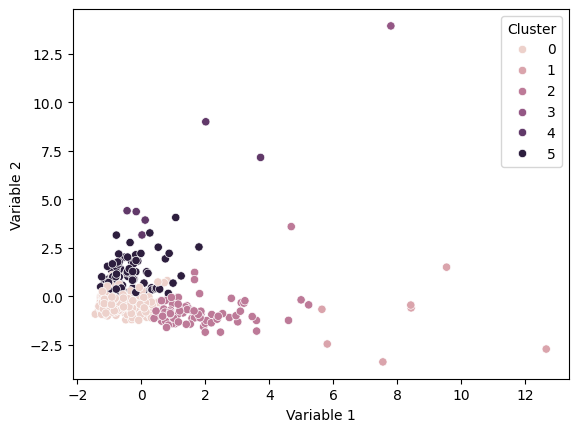

In [108]:
# Graficamos los distintos clústeres obtenidos:
scatter_PCA=sns.scatterplot(x='Var_1', y='Var_2', data=df_pca, hue='Cluster')
scatter_PCA.set_title('')
scatter_PCA.set_xlabel('Variable 1')
scatter_PCA.set_ylabel('Variable 2')

Utilizando el algoritmo PCA, logramos reducir todas las variables de entrada a solo dos componentes principales. Con esta simplificación, procedimos a entrenar un modelo de K-means. Inicialmente, exploramos diferentes cantidades de clústeres para determinar el número óptimo, y descubrimos que 6 era el más adecuado. Así que, entrenamos nuevamente el modelo K-means con 6 clústeres. Para concluir el proyecto, graficamos las distintas agrupaciones basándonos en los dos componentes obtenidos, lo que nos permitió visualizar los resultados en un gráfico de dos dimensiones.